In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from google.colab import files
import io

In [3]:
uploaded = files.upload()

Saving Electric_Production.csv to Electric_Production.csv


In [10]:
data = pd.read_csv(io.BytesIO(uploaded['Electric_Production.csv']))

In [11]:
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)

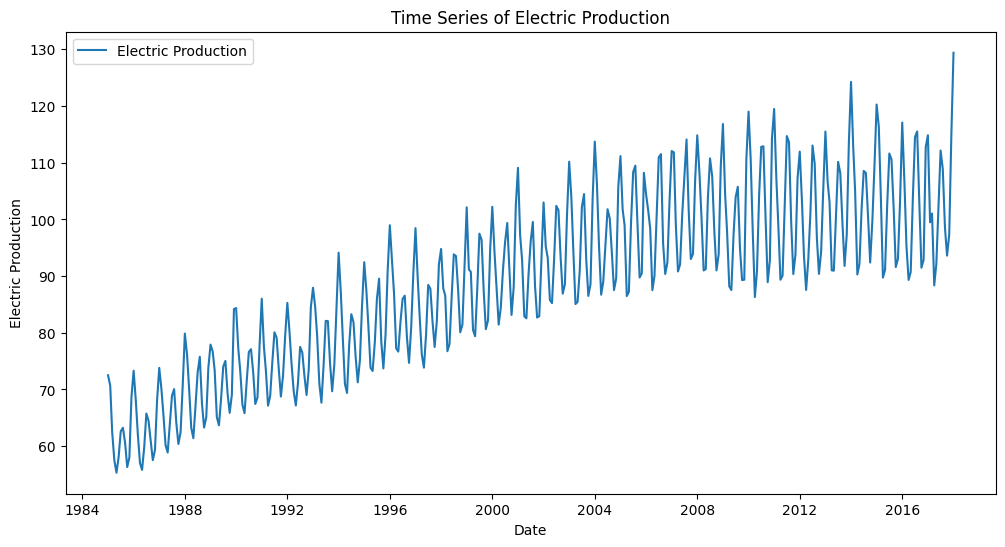

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['IPG2211A2N'], label='Electric Production')
plt.xlabel('Date')
plt.ylabel('Electric Production')
plt.title('Time Series of Electric Production')
plt.legend()
plt.show()

In [13]:
result = adfuller(data['IPG2211A2N'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.256990
p-value: 0.186215
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571


In [14]:
if result[1] < 0.05:
    print("The time series is likely stationary (reject H0).")
else:
    print("The time series is likely non-stationary (fail to reject H0).")

The time series is likely non-stationary (fail to reject H0).
